# Name : Aditya Nitin Pise.
# Organization : The Sparks Foundation

# Task 3 : Exploratory Data Analysis - Retail

- Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore'. 
- As a business manager, try to find out the weak areas where you can 
work to make more profit. 
- What all business problems you can derive by exploring the data?

## Step 1 : Importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [3]:
dataset = pd.read_csv("SampleSuperstore.csv")
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Step 2 : Data Preprocessing

In [4]:
dataset.shape

(9994, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
dataset.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

1. **From above we can see that there are 9994 rows and 13 columns.**
2. **There are no null values.**
3. **Postal code is categorical variable so we should change its data type.**
  

In [8]:
dataset['Postal Code'] = dataset['Postal Code'].astype('object')
dataset.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [19]:
#To check how many duplicated rows are present in the dataset
print("Duplicate rows before : {} ".format(dataset.duplicated().sum()))

#Deleting duplicate rows 
dataset.drop_duplicates(keep = 'first', inplace = True, ignore_index = True )

print("Duplicate rows after : {} ".format(dataset.duplicated().sum()))
dataset.head()

Duplicate rows before : 0 
Duplicate rows after : 0 


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Discount Range
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Low
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Low
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Low
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Med
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Low


## Step 3 : Visualizing to get insights

In [20]:
#checking the correaltion between the numerical variables
dataset.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

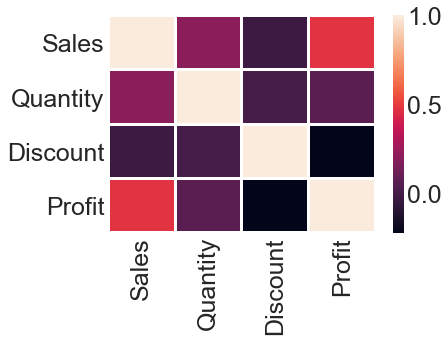

In [21]:
#ploting heatmap
sns.heatmap(dataset.corr(), linewidth = 2)

1. **From above heatmap we can see that there is correlation between Sales and Profit.**
2. **Also Sales and Quantity are slightly correlated.**

In [22]:
#defining a function to get to different plots
def get_plots(data, target_variable, color, max_categories = 25):
    
    #adding columns which have less than 25 unique values
    columns_list = [i for i in data.columns.values if len(data[i].unique()) < max_categories and len(data[i].unique()) > 1]
    

    rows = len(columns_list) // 2
    cols = len(columns_list) // 2
    
    fig = plt.figure(figsize = (30 ,30), dpi= 120)
    params = {
              'axes.labelsize' : 35,
              'xtick.labelsize' : 25,
              'ytick.labelsize' : 25,
              'legend.fontsize' : 15
            }
    plt.rcParams.update(params)
    
    #for loop to plot using different variable from column_list
    for i, num in zip(columns_list, range(1,len(columns_list)+1)):
        ax = fig.add_subplot(rows,cols,num)
        dataset.groupby(i)[target_variable].sum().plot(kind = 'bar', ax = ax, color = color)
    plt.tight_layout(pad = 3.0)
    plt.show()

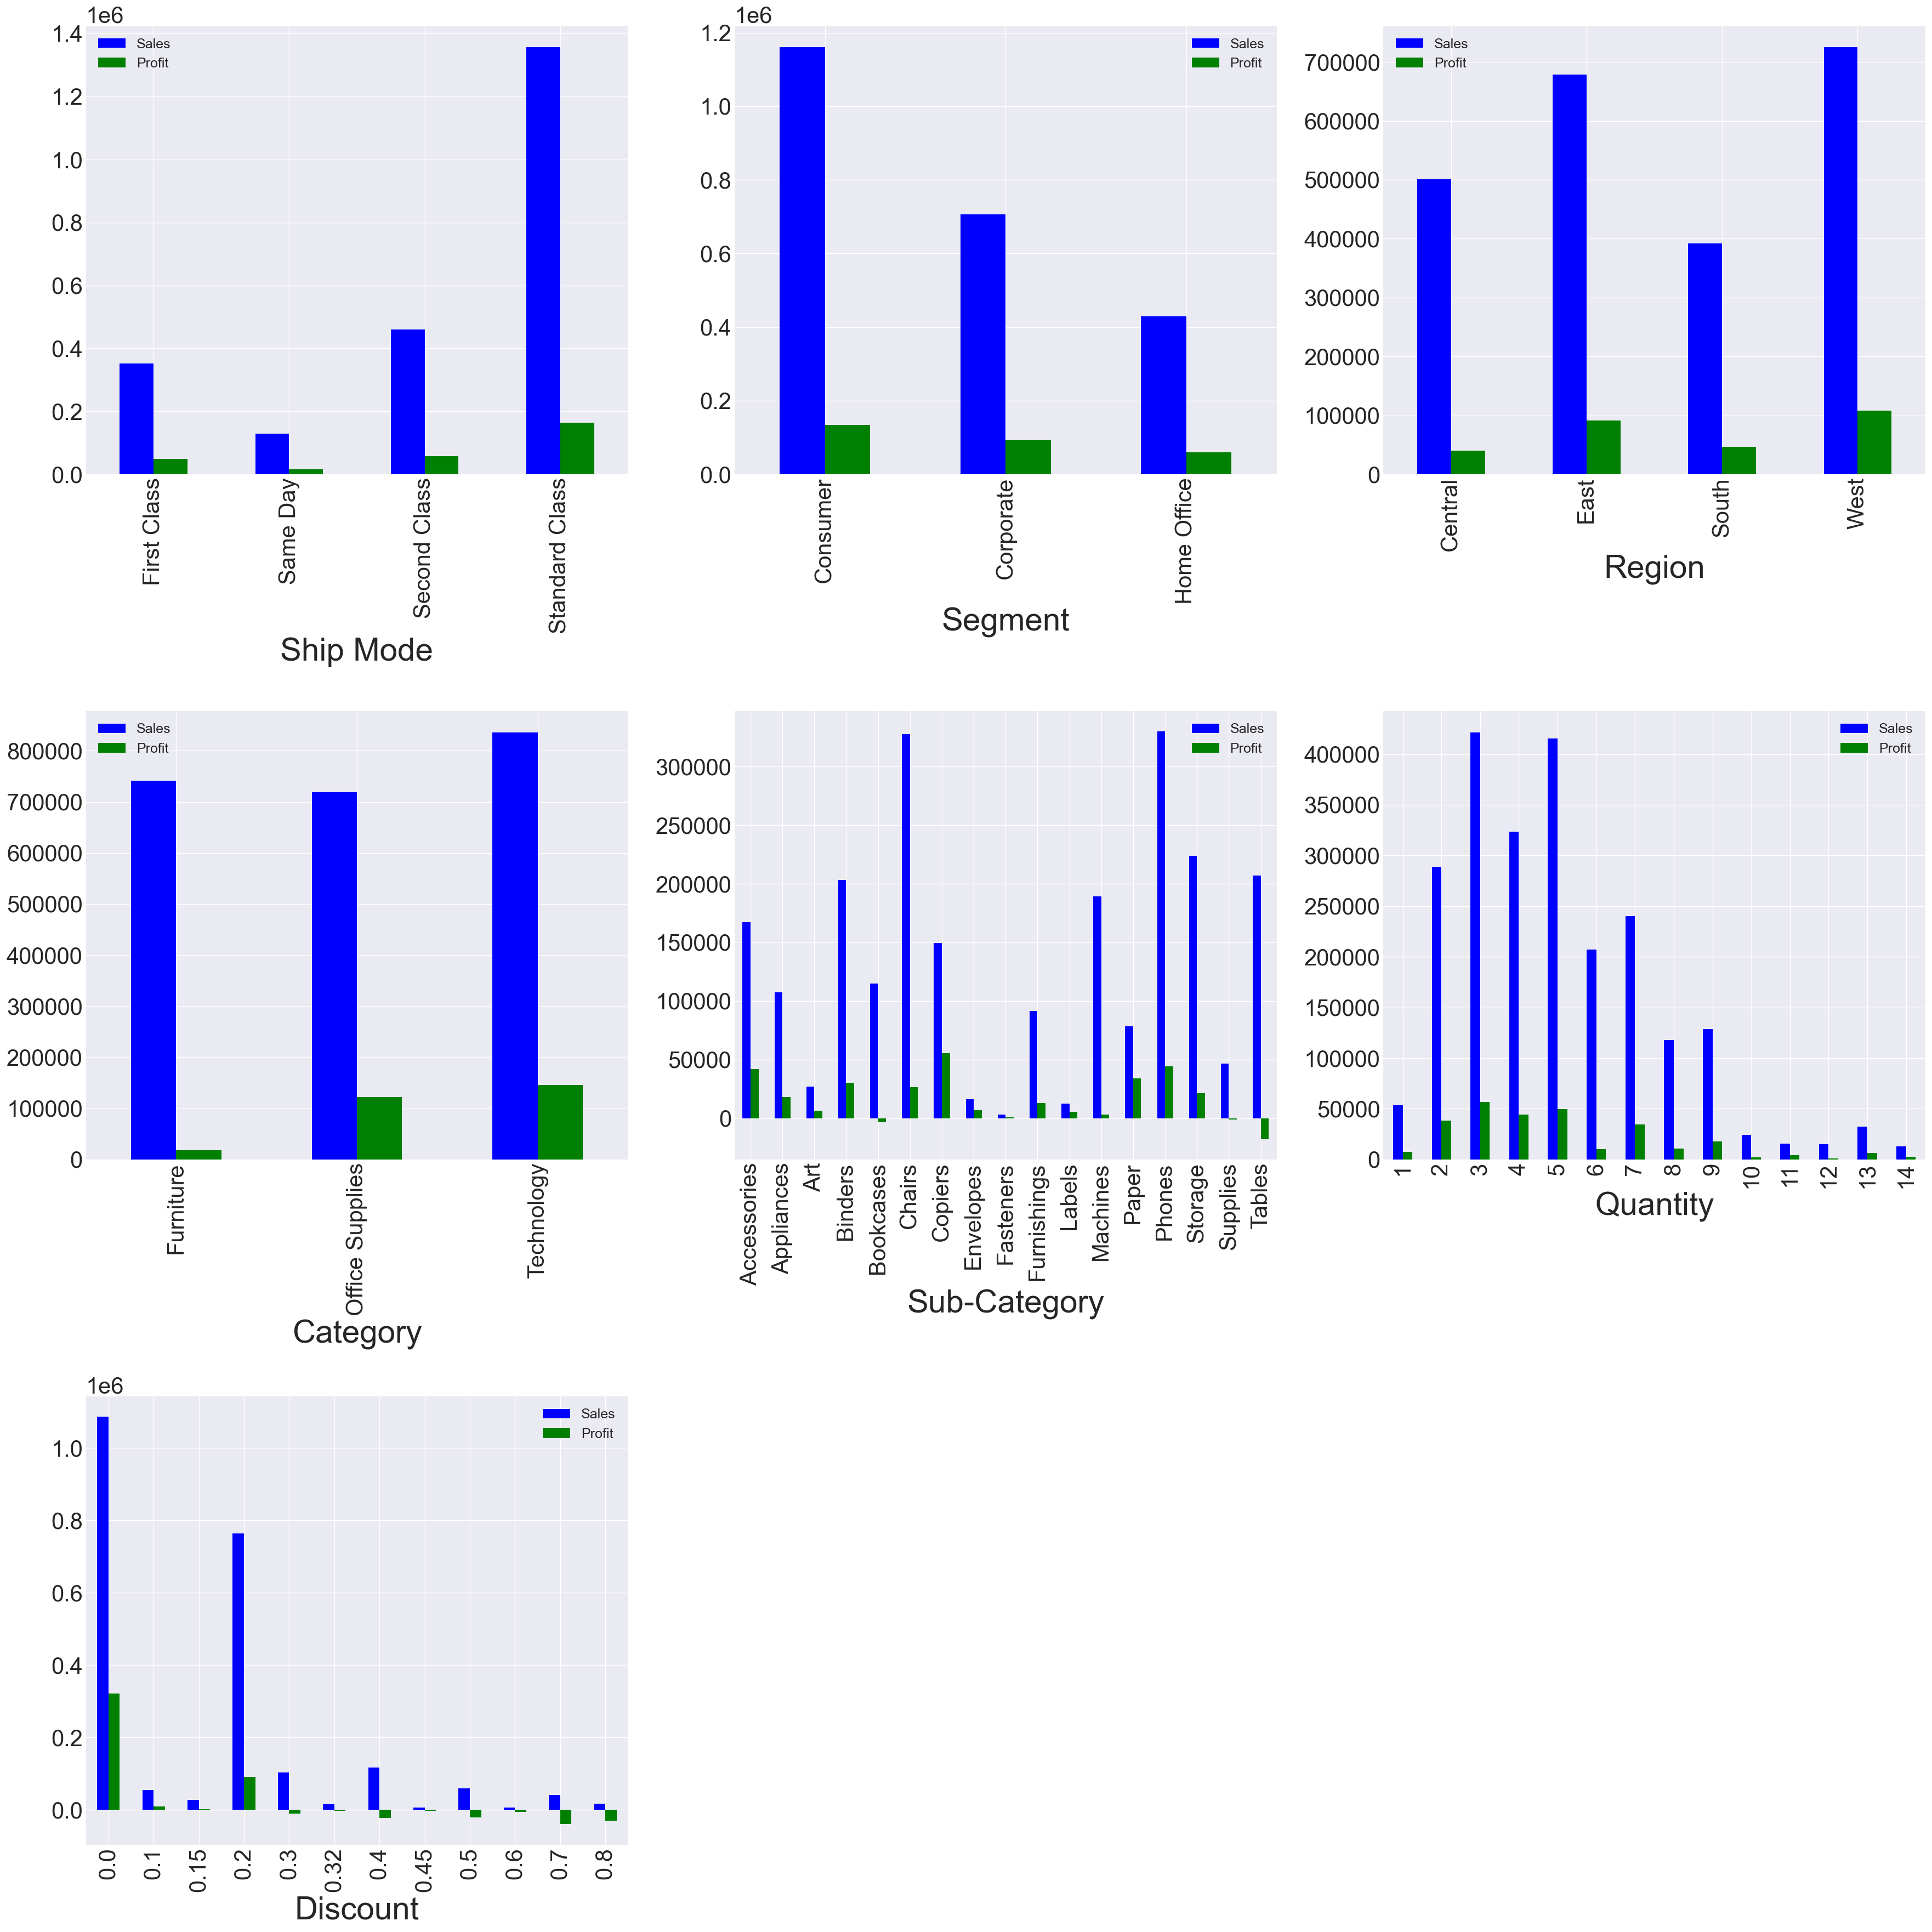

In [14]:
target_variable = ["Sales", "Profit"]
color = ["blue", "green"]
get_plots(dataset, target_variable, color)

- **Obesrvations :**

1. Most sales and profitable ship mode is Standard class.
2. Maximum Sales and profit are generated by Consumer Segment and lowest by Home Office.
3. West Region have maximum sales and South zone have lowest sales. 
4. Almost all three categories have same sales but among them Furniture category have average sales but lowest profit.
5. From Sub-Category Binders, Chairs, Copiers, Phones and Paper have maximum sales and profit whereas Bookcases and Tables have average sales with maximum loss. 
6. Sales and profit are great when no discount is given but for more than 30% discount loss is generated.

In [23]:
#grouping sales data according to different states
dataset.groupby("State")[["Sales", "Profit", "Discount"]].sum().sort_values(by = "Profit", ascending = False)

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Washington,138560.8100,33368.2375,32.40
Michigan,75879.6440,24428.0903,1.80
Virginia,70636.7200,18597.9504,0.00
Indiana,53555.3600,18382.9363,0.00
Georgia,49095.8400,16250.0433,0.00
Kentucky,36591.7500,11199.6966,0.00
Minnesota,29863.1500,10823.1874,0.00


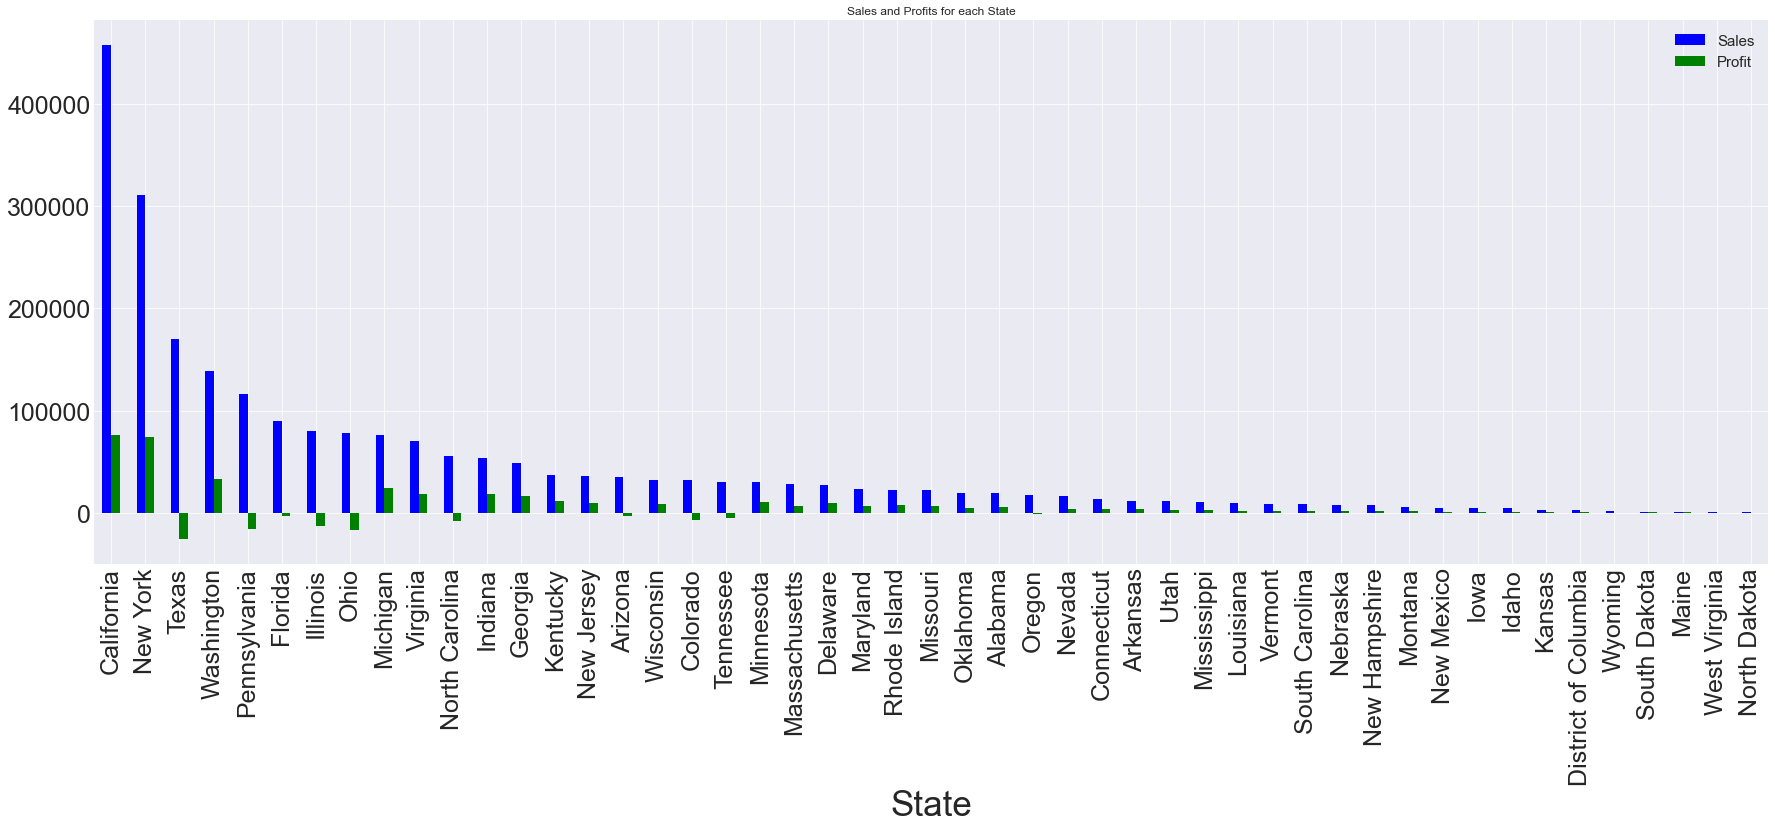

In [25]:
#plotting the bar graph using above data
plt.rcParams["figure.figsize"] = [30,10]
dataset.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "green"])
plt.title("Sales and Profits for each State")
plt.show()

1. States with maximum Sales and Profit are California, New York and Washington.
2. Whereas Texas, Ohio and Pennsylvania are the states with maximum loss. 

In [28]:
#Dividing discount variable in differnet ranges.
bins = [0, 0.33, 0.66]
names = ["Low", "Med", "High"]
d = dict(enumerate(names, 1))
dataset['Discount Range'] = np.vectorize(d.get)(np.digitize(dataset['Discount'], bins))
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Discount Range
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,Low
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,Low
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,Low
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,Med
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,Low


<AxesSubplot:xlabel='Discount Range'>

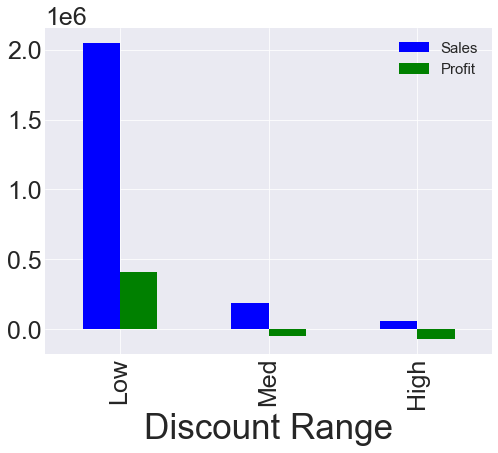

In [34]:
#plotting the graph using Discount Range variable
plt.rcParams["figure.figsize"] = [8,6]
dataset.groupby("Discount Range")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["blue", "green"])

1. When **Low(0-33%)** Discount is given Profit is increasing with increase in Sales.
2. When **Medium(33-66%)** Discount is given Profit is slightly decreasing with increase in Sales.
3. When **High(66-100%)** Discount is given Profit is significantly decreasing with increase in Sales.

## Things to focus to get Higher Profit

1. **Furniture category has lowest profit mostly because of highest discount percentage.**
2. **Some Cities having med-high sales are generating maximum loss.**
3. **Office and technology category have better sales and profit.**
4. **West and East region have maximum sales and profit while south region have lowest Sales.**